# SD-2 SM Milita Songailaitė 
### 1. Uždavinys
Simpsono metodu rasti integralo $\int_a^b f(x)dx$ artutinę reikšmę netolyginiame tinkle $x_i = a + i^2\frac{b-a}{n^2}$, kai $f(x) = \frac{1}{\sqrt{x^2 + 1}}$, $a = 0$, $b=5$, $n=5$.

### Sprendimas:
Naudojamas artinys:
$$ S_i = \int_{x_i}^{x_{i+1}} P_i(x)dx = \frac{h_i}{6} \left[ f(x_i) + 4f\left(\frac{x_i + x_{i+1}}{2}\right) \right] + f(x_{i+1}) $$

In [1]:
import numpy as np # Pagalbinės bibliotekos
import matplotlib.pyplot as plt

In [54]:
f = lambda t: 1/(np.sqrt((t**2)+1)) # Integruojamoji funkcija
a, b = 0, 5 # Integravimo rėžiai
n = 5 # Integravimo taškų skaičius
_h = (b-a)/n
_x = [a+(i*h) for i in range(0,n+1)]

h = (b-a)/(n**2)
x = [a+((i**2)*h) for i in range(0,n+1)]
h_arr = [x[i] - x[i-1] for i in range(1,n+1)]

In [55]:
def S(H, X, F):
    ''' Apsirašoma artinio S_i formulė '''
    return sum([((H[i]/6) * (F(X[i]) + 4*F((X[i]+X[i+1])/2))) + F(X[i+1]) for i in range(len(X)-1)])

In [56]:
s = S(h_arr, x, f)
print(f"Simpsono metodu gautas funkcijos integralo artinys: {s}")

Simpsono metodu gautas funkcijos integralo artinys: 4.733713985432907


### 2. Uždavinys
Rasti funkcijai $\frac{sin(2x)}{x}$ tinkle $(x_0 = 1, x_1 = 2, x_2 = 3)$ interpoliuojantį kubinį splainą $S(x)$, kurio išvestinė taške $x_0$ lygi $d' = -1$, o antroji išvestinė lygi $d'' = -5$. Rasti skaičius $S(1.5)$ ir $S(2.5)$.

In [48]:
x = np.array([1,2,3]) # Interpoliavimo tinklas
f = lambda t: np.sin(2*t)/t # Interpoliuojama funkcija
y = f(x)
d0p = -1 # Pirmoji išvestinė taške x0
d0pp = -5 # Antroji išvestinė taške x0

In [68]:
def a(X, Y, D0p, D0pp):
    '''Funkcija, apskaičiuojanti rezultatą A^(-1) * C'''
    A = np.array([[1, X[0], (X[0]**2), (X[0]**3)], [1, X[1], (X[1]**2), (X[1]**3)], [0, 1, 2*X[0], 3*(X[0]**2)], [0, 0, 2, 6*X[0]]])
    C = np.array([Y[0], Y[1], D0p, D0pp]).T
    return np.dot(np.linalg.inv(A), C)

In [74]:
A = a(x,y,d0p,d0pp)
S0 = lambda t: A[0] + A[1]*t + A[2]*(t**2) + A[3]*(t**3) # Funkcija S0
S0p = lambda t: A[1] + 2*A[2]*t + 3*A[3]*(t**2) # Funkcijos S0 pirmoji išvestinė
S0pp = lambda t: 2*A[2] + 6*A[3]*t # Funkcijos S0 antroji išvestinė

t0 = np.arange(x[0], x[1]+0.01, 0.01) # Tinklas t0 (t.y. tinklas pirmajam funkcijos segmentui)
t = np.arange(1, x[-1]+0.01, 0.01) # Tinklas t

In [75]:
d1p = S0p(x[1]) # Pirmoji išvestinė taške x1
d1pp = S0pp(x[1]) # Antroji išvestinė taške x1

def b(X, Y, D1p, D1pp):
    '''Funkcija, apskaičiuojanti rezultatą B^(-1) * D'''
    B = np.array([[1, X[1], (X[1]**2), (X[1]**3)], [1, X[2], (X[2]**2), (X[2]**3)], [0, 1, 2*X[1], 3*(X[1]**2)], [0, 0, 2, 6*X[1]]])
    D = np.array([Y[1], Y[2], D1p, D1pp]).T
    return np.dot(np.linalg.inv(B), D)

In [77]:
B = b(x,y,d1p,d1pp)
S1 = lambda t: B[0] + B[1]*t + B[2]*(t**2) + B[3]*(t**3) # Funkcija S1
S1p = lambda t: B[1] + 2*B[2]*t + 3*B[3]*(t**2) # Funkcijos S1 pirmoji išvestinė
S1pp = lambda t: 2*B[2] + 6*B[3]*t # Funkcijos S1 antroji išvestinė

Funkcijos S reikšmės:

In [80]:
print(f" S(1.5) = {S0(1.5)}")
print(f" S(2.5) = {S1(2.5)}")

 S(1.5) = 0.06083509251572394
 S(2.5) = 0.4132085841583688


## Splaino grafikų braižymas

In [81]:
# Pagalbinės funkcijos grafimas braižyti
def error_f(S, f):
    return S - f

def plot_x_segment(t_x, T, S_x, title, legend, F):
    plt.title(title)
    plt.plot(t_x, S_x(t_x), color='r', linewidth=3)
    plt.plot(T, S_x(T), color='b', linestyle='dashed')
    plt.plot(T, F(T), color='gray', linestyle='dashed')
    plt.legend(legend)
    plt.show()
    
def plot_cubic_spline(t_0, t_1, T, S_0, S_1, F):
    plt.title('Kubinis splainas')
    plt.plot(t_0, S_0(t_0), color='r', linewidth=3)
    plt.plot(t_1, S_1(t_1), color='g', linewidth=3)
    plt.plot(T, F(T), color='gray', linestyle='dashed')
    plt.legend(('S0(t0)', 'S1(t1)', 'f(t)'))
    plt.show()
    
def plot_err(t_0, t_1, s0_err, s1_err):
    plt.title('Kubinio splaino absoliutinė paklaida')
    plt.plot(t_0, s0_err, c='r')
    plt.plot(t_1, s1_err, c='b')
    plt.legend(('S0(t0) - f(t0)', 'S1(t1) - f(t1)'))
    plt.axhline(y=0, color='black', linewidth=1)
    plt.show()

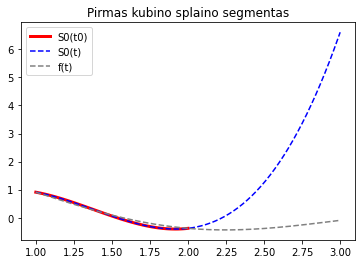

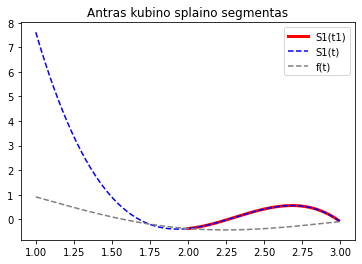

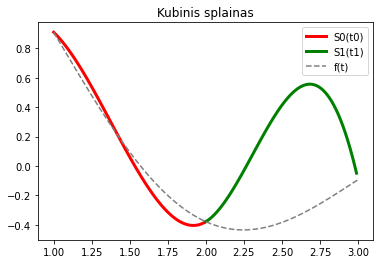

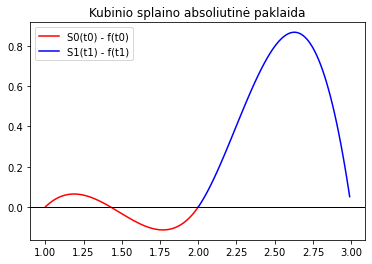

In [83]:
# Kintamųjų apsirašymas bei grafikų braižymas
t1 = np.arange(x[1], x[2], 0.01)
t_err = np.arange(x[0], x[2], 0.01)
plot_x_segment(t0, t, S0, 'Pirmas kubino splaino segmentas', ('S0(t0)', 'S0(t)', 'f(t)'), f)
plot_x_segment(t1, t, S1, 'Antras kubino splaino segmentas', ('S1(t1)', 'S1(t)', 'f(t)'), f)
plot_cubic_spline(t0, t1, t, S0, S1, f)

S0_err = error_f(S0(t0), f(t0))
S1_err = error_f(S1(t1), f(t1))
plot_err(t0, t1, S0_err, S1_err)